## Using Correlation, Varience of feature and LASSO Regularization for feature selection and Using Pipelining in model making

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

Reading car data

In [2]:
carData = pd.read_csv(".\data\carDataSet\CarPrice.csv")

In [3]:
featureMeaning = pd.read_csv(".\data\carDataSet\dataDictionary.csv")

In [4]:
featureMeaning

,FEATURE NAME,FEATURE DETAIL
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of..."
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [5]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
carData = carData.drop(['CarName', 'car_ID'], axis=1)

In [8]:
feature_to_transform = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype'
                       , 'cylindernumber', 'fuelsystem']

In [9]:
for i in feature_to_transform:
    print(carData[i].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [10]:
label=['fueltype', 'aspiration','doornumber','drivewheel','enginelocation']     #by label encoding
onehot=['carbody', 'enginetype','fuelsystem']                                   #by one-hot encoding
cylindernum={'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8} #special case handling

In [11]:
for i in label:
    carData[i] = LabelEncoder().fit_transform(carData[i])

carData = pd.get_dummies(carData, columns = onehot)

carData['cylindernumber'] = carData['cylindernumber'].map(cylindernum)  

# Refering feature variance of feature selection

In [12]:
varienceData = VarianceThreshold(threshold=0)
varienceData.fit(carData)
varienceData.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Splitting Data set for Test and Train

In [13]:
y = carData['price']
X = carData.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Making Linear Regression Model

Train Accuracy Score: 0.9268253194150504
Test Accuracy Score: 0.8534783684465731


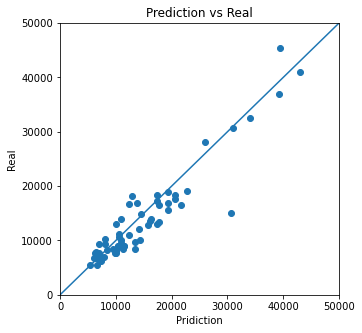

In [14]:
model = LinearRegression().fit(X_train, y_train)
print("Train Accuracy Score:", end=' ')
print(model.score(X_train, y_train))
print("Test Accuracy Score:", end=' ')
print(model.score(X_test, y_test))
pred = model.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(pred, y_test)
plt.xlabel('Pridiction')
plt.ylabel('Real')
plt.plot([0,50000], [0,50000])
plt.xlim(0, 50000)
plt.ylim(0, 50000)
plt.title("Prediction vs Real")
plt.show()

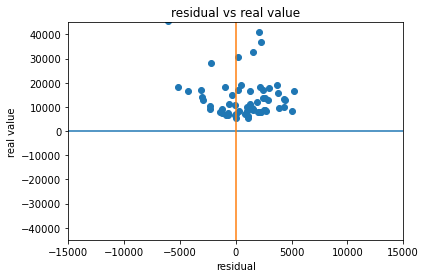

In [15]:
residual = []
for i in range(pred.size):
    residual.append(pred[i] - y_test.values[i])
plt.scatter(residual, y_test)
plt.xlim(-15000, 15000)
plt.ylim(-45000, 45000)
plt.plot([-15000, 15000], [0, 0])
plt.plot([0,0], [-45000, 45000])
plt.xlabel("residual")
plt.ylabel("real value")
plt.title("residual vs real value")
plt.show()

Here we can see the model is having high degree of overfitting in it and the model is complex too because it uses very large number of features in modeling.

Now we make inter feature correlation grid by corr() function avilable in pandas dataframe.
We are going to plot the correlation grid using seaborn heatmap so that we can use color coding to seperate features.

## Refering inter feature correlation for feature selection

<AxesSubplot:>

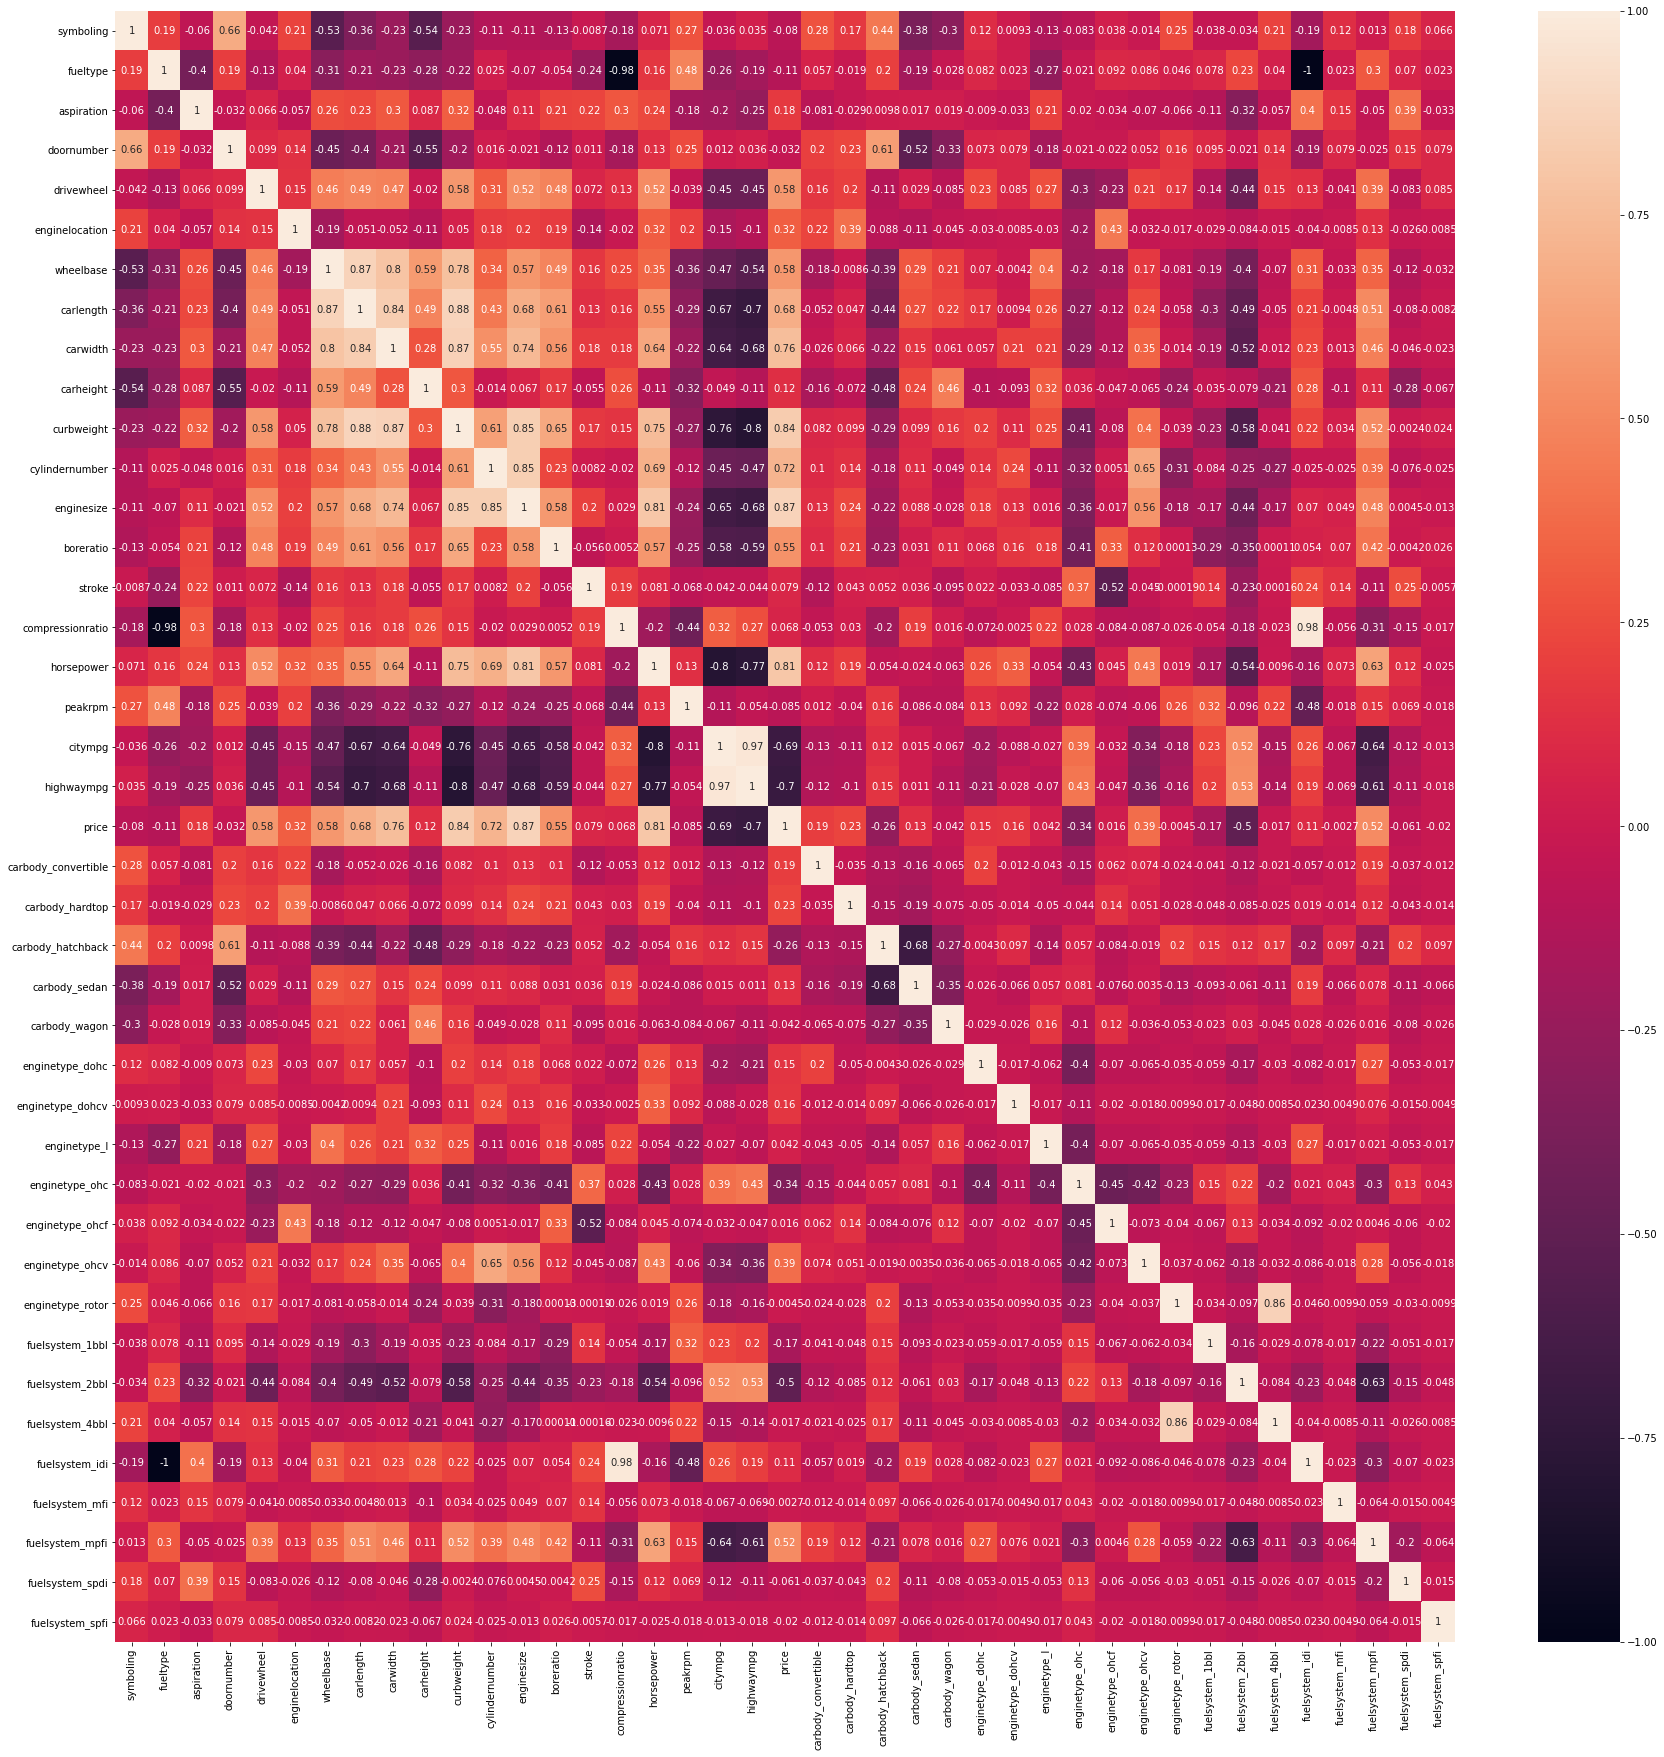

In [16]:
cor = carData.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=True)

In [17]:
#enginelocation carlength curbweight enginesize highwaympg carbody_hatchback enginetype_ohcv fulesystem_2bbl fuelsystem_mpfi
feature = ['price', 'enginelocation','curbweight','enginesize','highwaympg','carbody_hatchback','enginetype_ohcv'
           ,'fulesystem_2bbl','fulesystem_mpfi']
notfeature = []
for i in carData.columns:
    if i not in feature:
        notfeature.append(i)

In [18]:
newData = carData.drop(notfeature, axis=1)
varienceData = VarianceThreshold(threshold=0)
varienceData.fit(newData)
varienceData.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [19]:
y = newData['price']
X = newData.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Train Accuracy Score: 0.8294950122964885
Test Accuracy Score: 0.8533996184350771


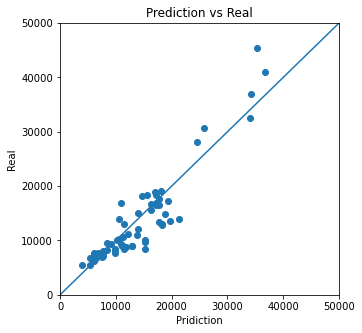

In [20]:
model = LinearRegression().fit(X_train, y_train)
print("Train Accuracy Score:", end=' ')
print(model.score(X_train, y_train))
print("Test Accuracy Score:", end=' ')
print(model.score(X_test, y_test))
pred = model.predict(X_test)


plt.figure(figsize=(5,5))
plt.scatter(pred, y_test)
plt.xlabel('Pridiction')
plt.ylabel('Real')
plt.plot([0,50000], [0,50000])
plt.xlim(0, 50000)
plt.ylim(0, 50000)
plt.title("Prediction vs Real")
plt.show()

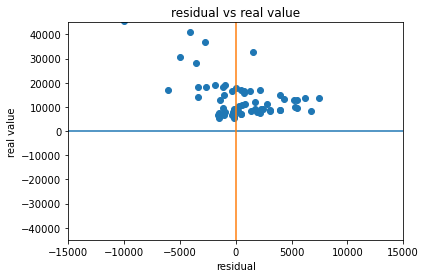

In [21]:
residual = []
for i in range(pred.size):
    residual.append(pred[i] - y_test.values[i])
plt.scatter(residual, y_test)
plt.xlim(-15000, 15000)
plt.ylim(-45000, 45000)
plt.plot([-15000, 15000], [0, 0])
plt.plot([0,0], [-45000, 45000])
plt.xlabel("residual")
plt.ylabel("real value")
plt.title("residual vs real value")
plt.show()

# By using LASSO Regularization(L1)

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [23]:
tData = carData
tData[carData.columns] = MinMaxScaler().fit_transform(carData)
# transforming data set to make aplha in [0,1] otherwise it will 
# be in [0, +infinity)

y = tData['price']
X = tData.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model_lasso = Lasso(alpha=0.000352)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.000352)

Train Accuracy Score: 0.9090287377501369
Test Accuracy Score: 0.8840612593889199


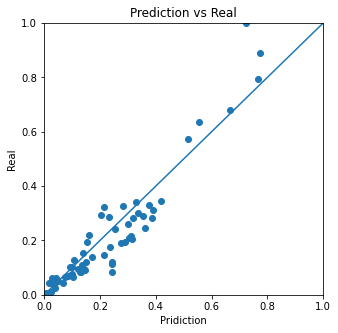

In [24]:
print("Train Accuracy Score:", end=' ')
print(model_lasso.score(X_train, y_train))
print("Test Accuracy Score:", end=' ')
print(model_lasso.score(X_test, y_test))
pred = model_lasso.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(pred, y_test)
plt.xlabel('Pridiction')
plt.ylabel('Real')
plt.plot([0,1], [0,1])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Prediction vs Real")
plt.show()

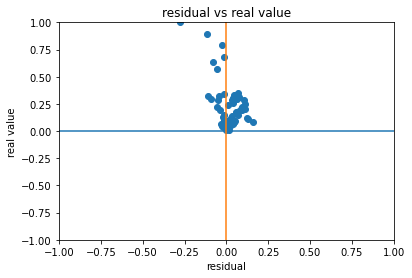

In [25]:
residual = []
for i in range(pred.size):
    residual.append(pred[i] - y_test.values[i])
plt.scatter(residual, y_test)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot([-1, 1], [0, 0])
plt.plot([0,0], [-1, 1])
plt.xlabel("residual")
plt.ylabel("real value")
plt.title("residual vs real value")
plt.show()

# Pipelining

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline   #The pipelining library

In [27]:
y = newData['price']
X = newData.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [28]:
pipe = Pipeline([ ('MinMaxScale', MinMaxScaler()),
                 ('LR model', LinearRegression())],
                verbose=True)
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(pipe.score(X_train, y_train))

[Pipeline] ....... (step 1 of 2) Processing MinMaxScale, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing LR model, total=   0.0s
0.8533996184350767
0.8294950122964885


Here the pipeline is made using sklearn library where we use "Pipeline" function to initalize.
In the Initalization the last entry in dictionary like argument should be the estimator which implements the fit operation (the model).
Other parameters before that are tranformation methods which might scale or tranform the dataset.
for further reference https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html